In [4]:
import numpy as np
from matplotlib import pyplot as plt

# Import the plot style settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc('font', size='16')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
})

#import cosmowap libraries
import cosmo_wap as cw
import cosmo_wap.bk as bk #import terms for the bispectrum
import cosmo_wap.pk as pk #import terms for the powerspectrum

from cosmo_wap.lib.bk_plots import *

/home/chris/Documents/CosmoWAP/wap_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/chris/Documents/CosmoWAP/src/cosmo_wap/lib/bk_plots.py:445: SyntaxWarning: invalid escape sequence '\D'
  axs[1,0].set_ylabel('$|\Delta B_{(0,0)}|/B^N_{(0,0)}$')


## Set up survey and cosmology 

In [5]:
# get cosmoology from class
cosmo = cw.utils.get_cosmo() 

# load some set survey biases - or we can define our own
survey_params = cw.SurveyParams()

# combine all in main cosmowap class!
# so lets have some euclid-likes biases
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid(cosmo)],compute_bias=True)
# also try: MegaMapper,BGS,Roman etc

Computing bias functions...


### Multipole functions have this format
- term.lx(cosmo_funcs,k1,k2,k3,theta,zz, **kwargs) 

Where term could be:
['NPP','RR1','RR2','WA1','WA2','WAGR','WS','WAGR','RRGR','WSGR','Full','GR1','GR2','Loc','Eq','Orth','IntInt','IntNPP'] # list of terms currently implemented. Does not inlclude composites - see pk/combined.py etc

NPP - is the newtownian plane-parallel (constant redshift) term - i.e. standard Kaiser term


### So now everything is set up - let's plot the monopole

In [3]:
# lets define our triangles:

#so now we set bispectrum as a function of k1,k2,theta and z

zz=1 # redshift

#so lets look at the bispectrum as function of theta for fixed k1 and k2 

k1=0.04
k2=k1/2
theta = np.linspace(0,np.pi,200)
k3 = np.sqrt(k1**2 + k2**2 + 2*k1*k2*np.cos(theta))

#set LOS - this is the natural choice for your theory for the monopole
r=s=1/3

# we can store this set of parameters in a dict
kwargs = {
    'cosmo_funcs': cosmo_funcs,
    'k1': k1,
    'k2': k2,
    'k3': k3,
    'theta': theta,
    'zz': zz,
}

### example 1: monopole...

Text(0.5, 0, '$\\theta $')

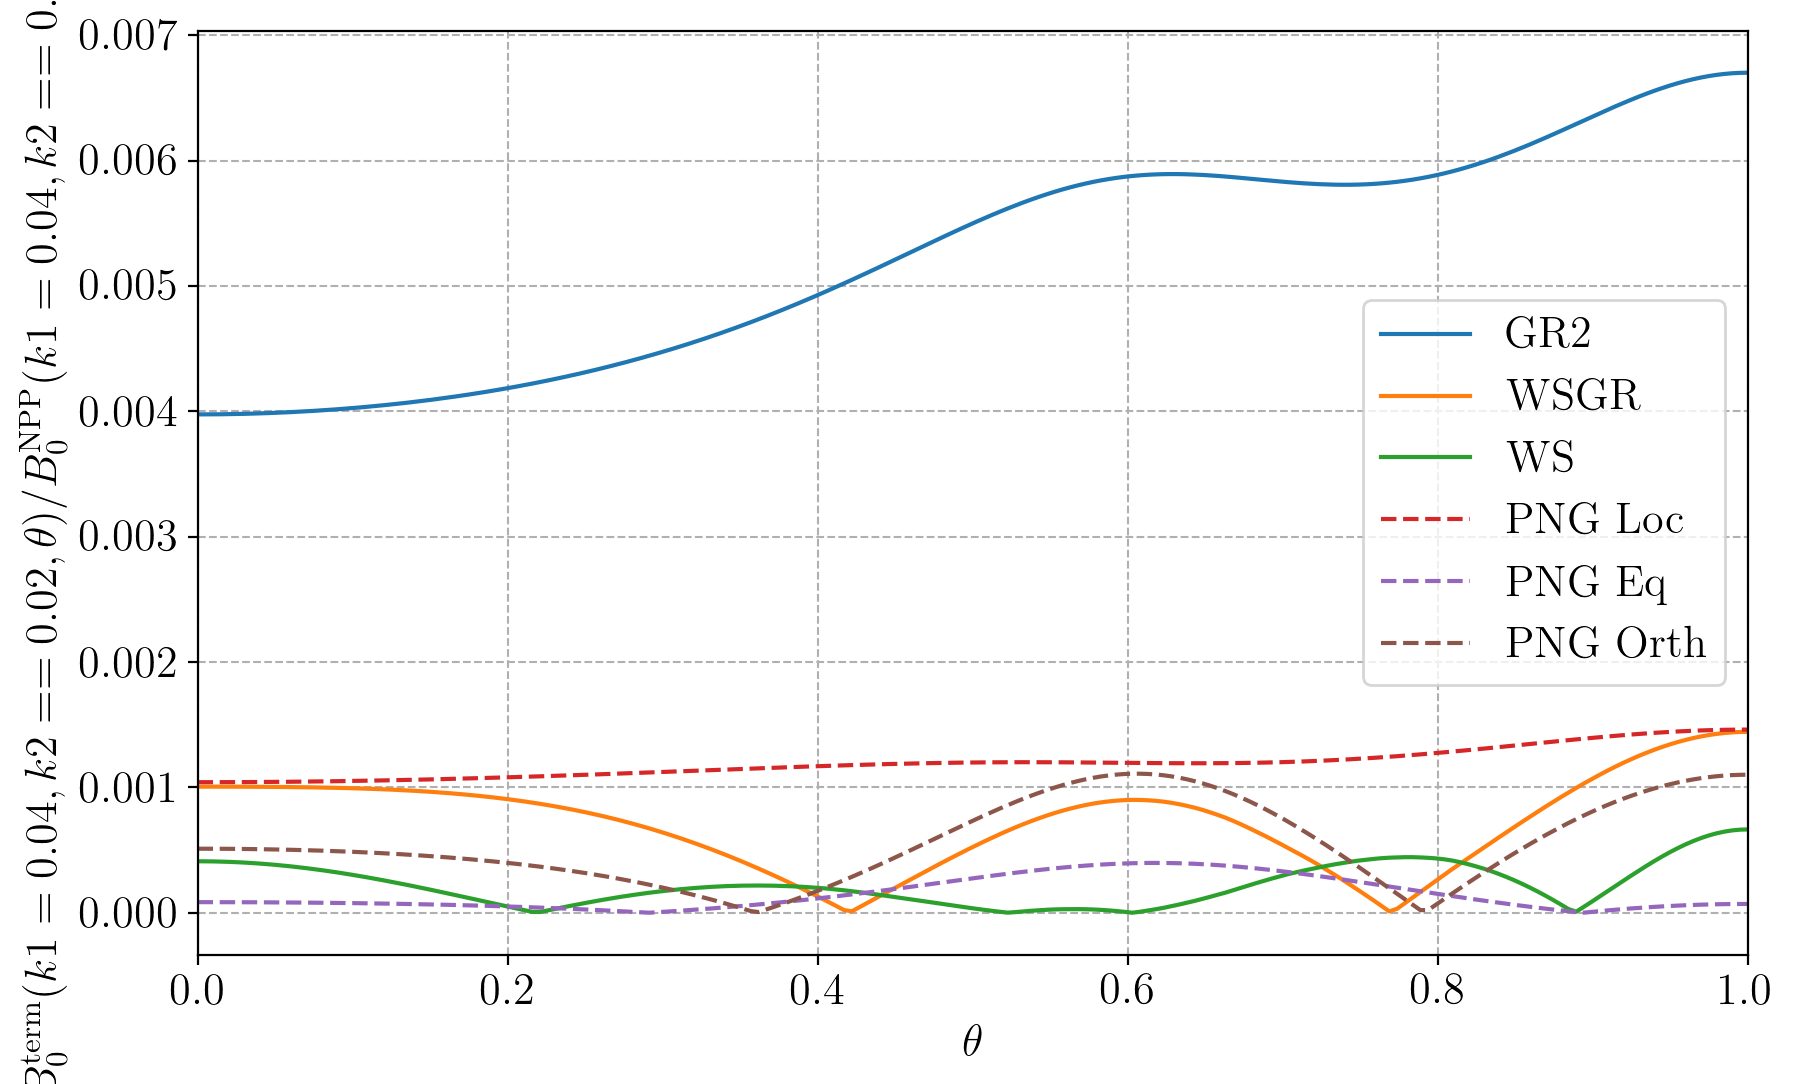

In [4]:
#for monopole 
plt.figure(figsize=(10,6))

#lets plot as fraction of monopole - NPP (Newtonian Plane-Parallel)
norm = np.abs(bk.NPP.l0(**kwargs).real)

#regular newtonian expression
plt.plot(theta/np.pi,np.abs(bk.GR2.l0(**kwargs).real)/norm,label='GR2')   # pure GR
plt.plot(theta/np.pi,np.abs(bk.WSGR.l0(**kwargs).real)/norm,label='WSGR') #GR/WS mixing
plt.plot(theta/np.pi,np.abs(bk.WS.l0(**kwargs).real)/norm,label='WS')     # pure WS

plt.plot(theta/np.pi,np.abs(bk.Loc.l0(**kwargs).real)/norm,'--',label='PNG Loc')
plt.plot(theta/np.pi,np.abs(bk.Eq.l0(**kwargs).real)/norm,'--',label='PNG Eq')
plt.plot(theta/np.pi,np.abs(bk.Orth.l0(**kwargs).real)/norm,'--',label='PNG Orth')
plt.legend()

plt.xlim(0,1)
plt.ylabel(r'$| B^{\rm term}_0(k1=0.04,k2==0.02,\theta)/B^{\rm NPP}_0(k1=0.04,k2==0.02,\theta) |$')
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$\theta $')


### example 2: Ok so for now odd parity dipole

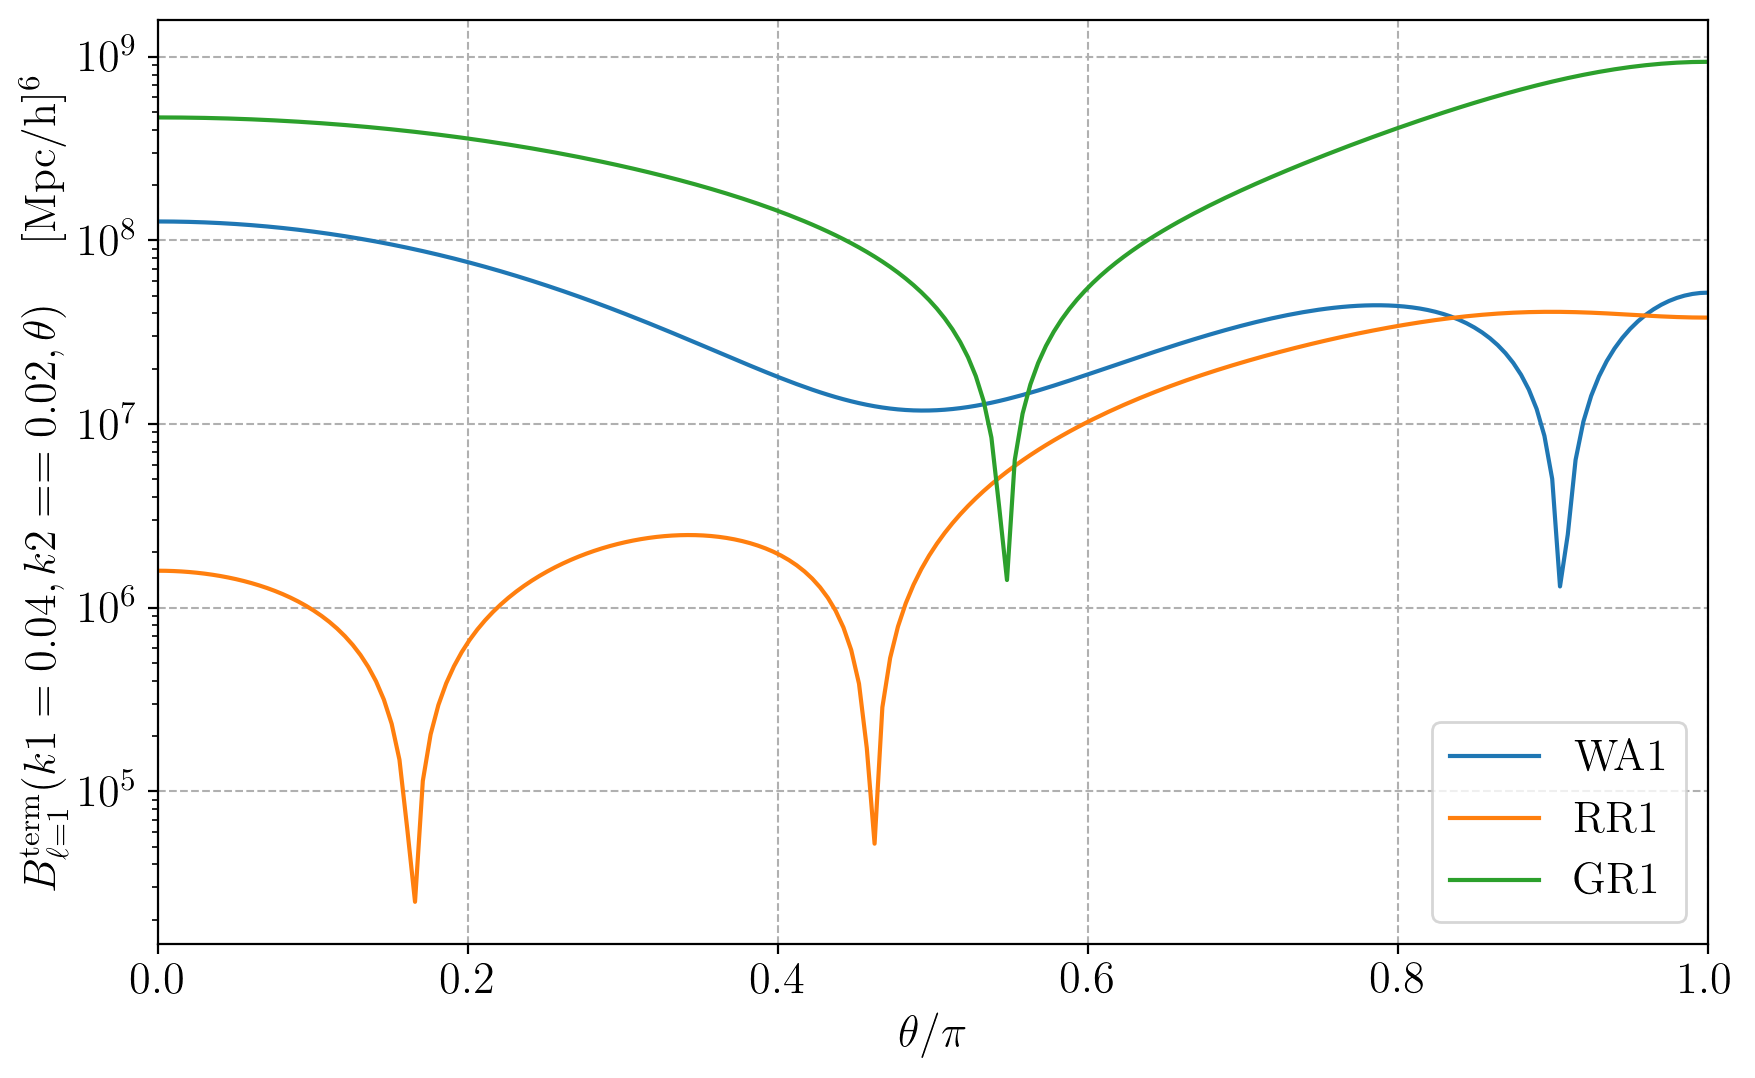

In [5]:
# for dipole
plt.figure(figsize=(10,6))
r=s=0 # endpoint
plt.plot(theta/np.pi,np.abs(bk.WA1.l1(**kwargs,r=r,s=s).imag),label='WA1')
plt.plot(theta/np.pi,np.abs(bk.RR1.l1(**kwargs,r=r,s=s).imag),label='RR1')
plt.plot(theta/np.pi,np.abs(bk.GR1.l1(**kwargs,r=r,s=s).imag),label='GR1')

plt.xlim(0,1)

plt.yscale('log')
plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$\theta /\pi $')
plt.ylabel(r'$ B^{\rm term}_{\ell=1}(k1=0.04,k2==0.02,\theta) $ \quad [Mpc/h$]^6$')
plt.show()

### Here are some preset plotting routines - see cosmo_wap/lib/bkplots for the functions 

/home/chris/Documents/CosmoWAP/src/cosmo_wap/lib/utils.py:88: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(cos_theta)


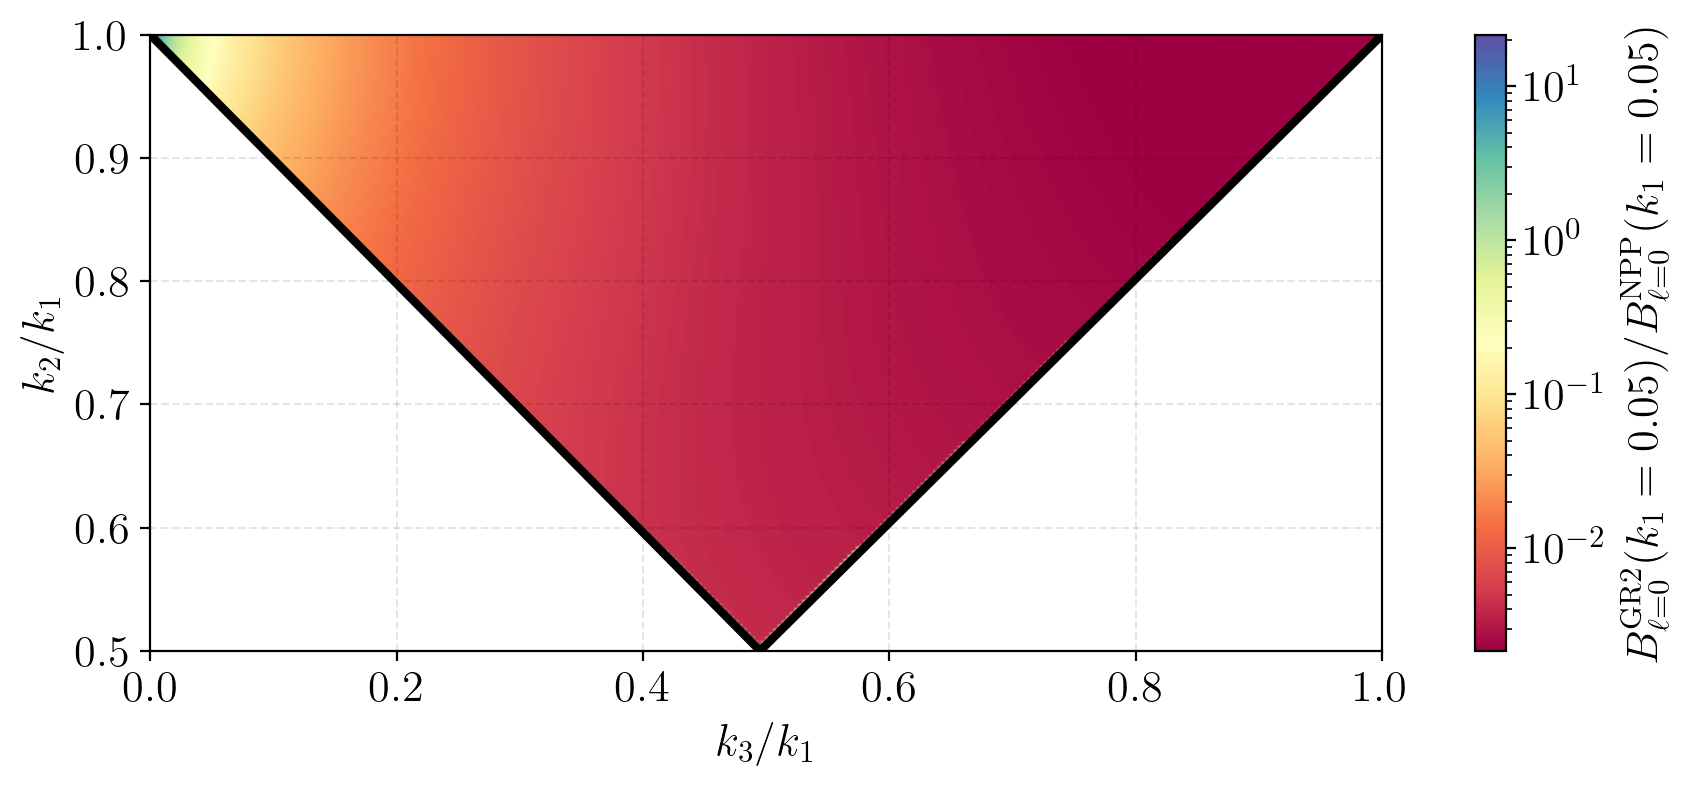

In [6]:
plot_triangle('GR2',0,cosmo_funcs, zz=1, k1=0.05,norm=True,log=True,size=300)

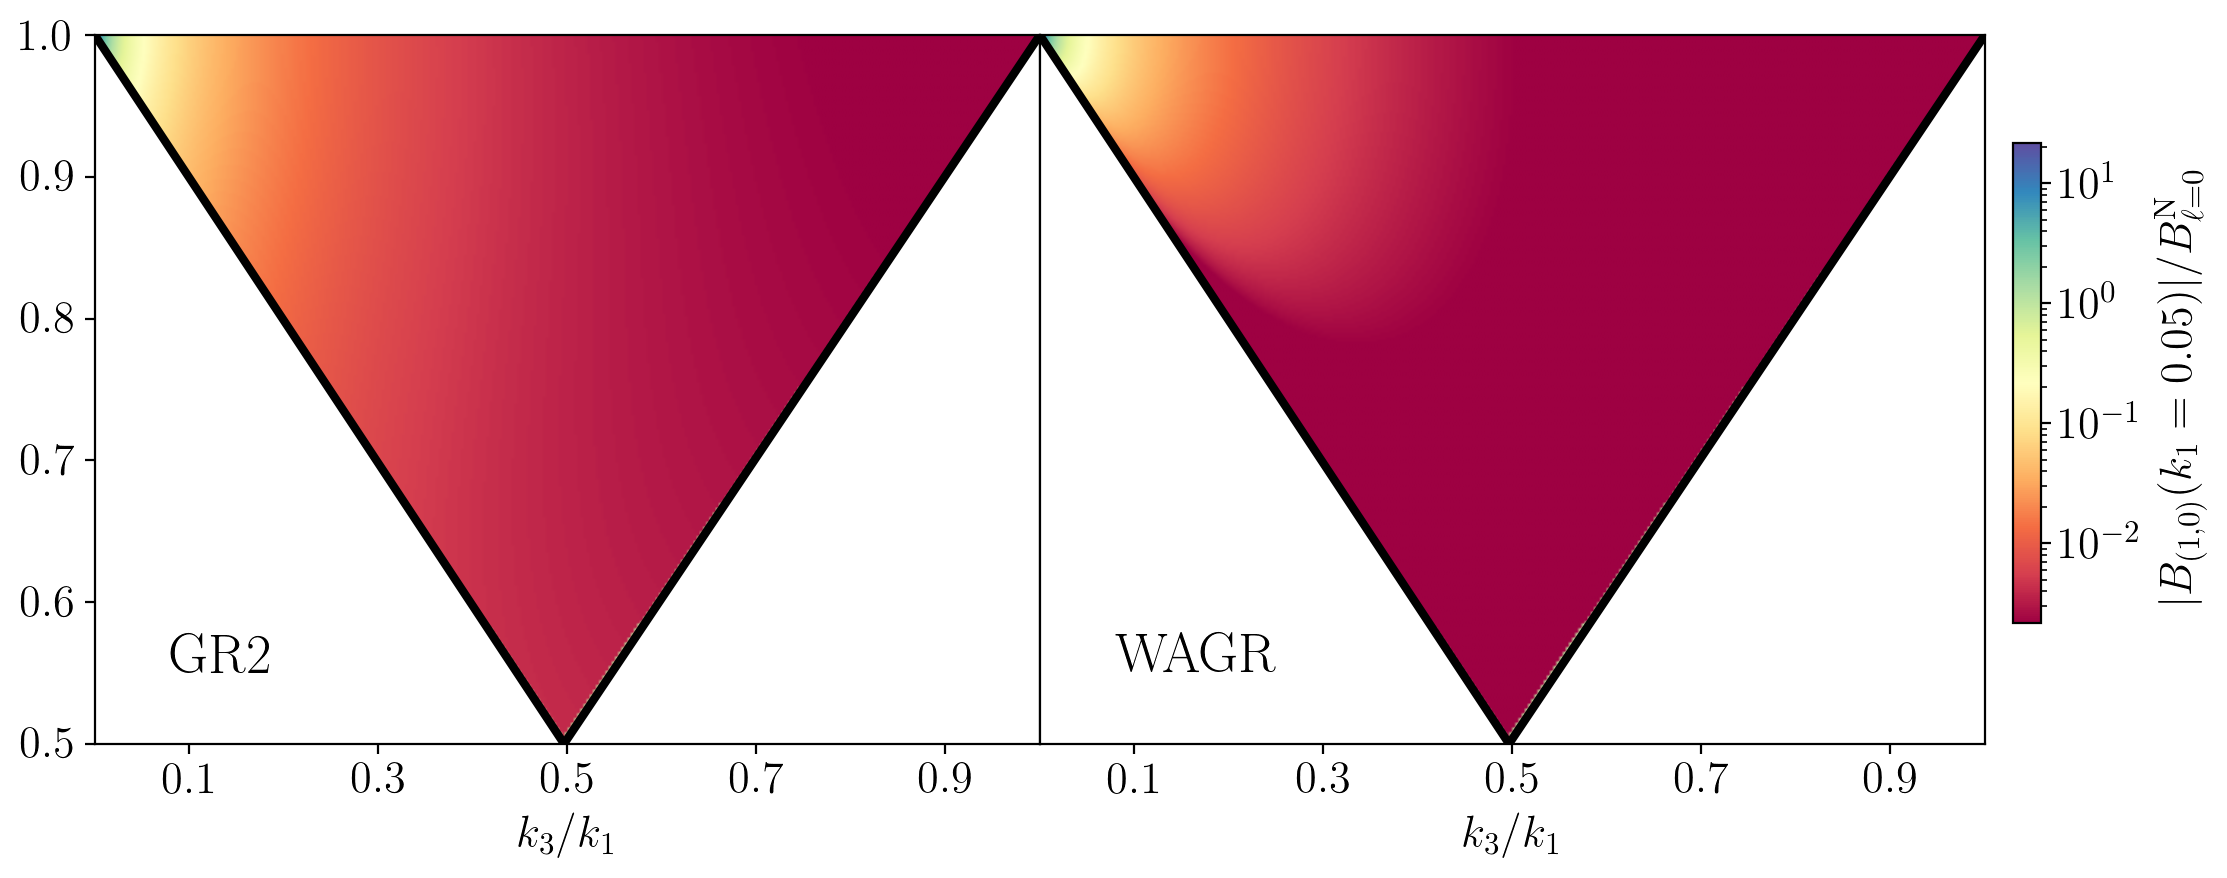

In [7]:
fig, axs = plot_triangle_multi(['GR2','WAGR'],0,cosmo_funcs, zz=1, k1=0.05,r=0,s=0,norm=True,size=300,log=True)
#plt.show()

### so ok plots over all traingles - these are nice 

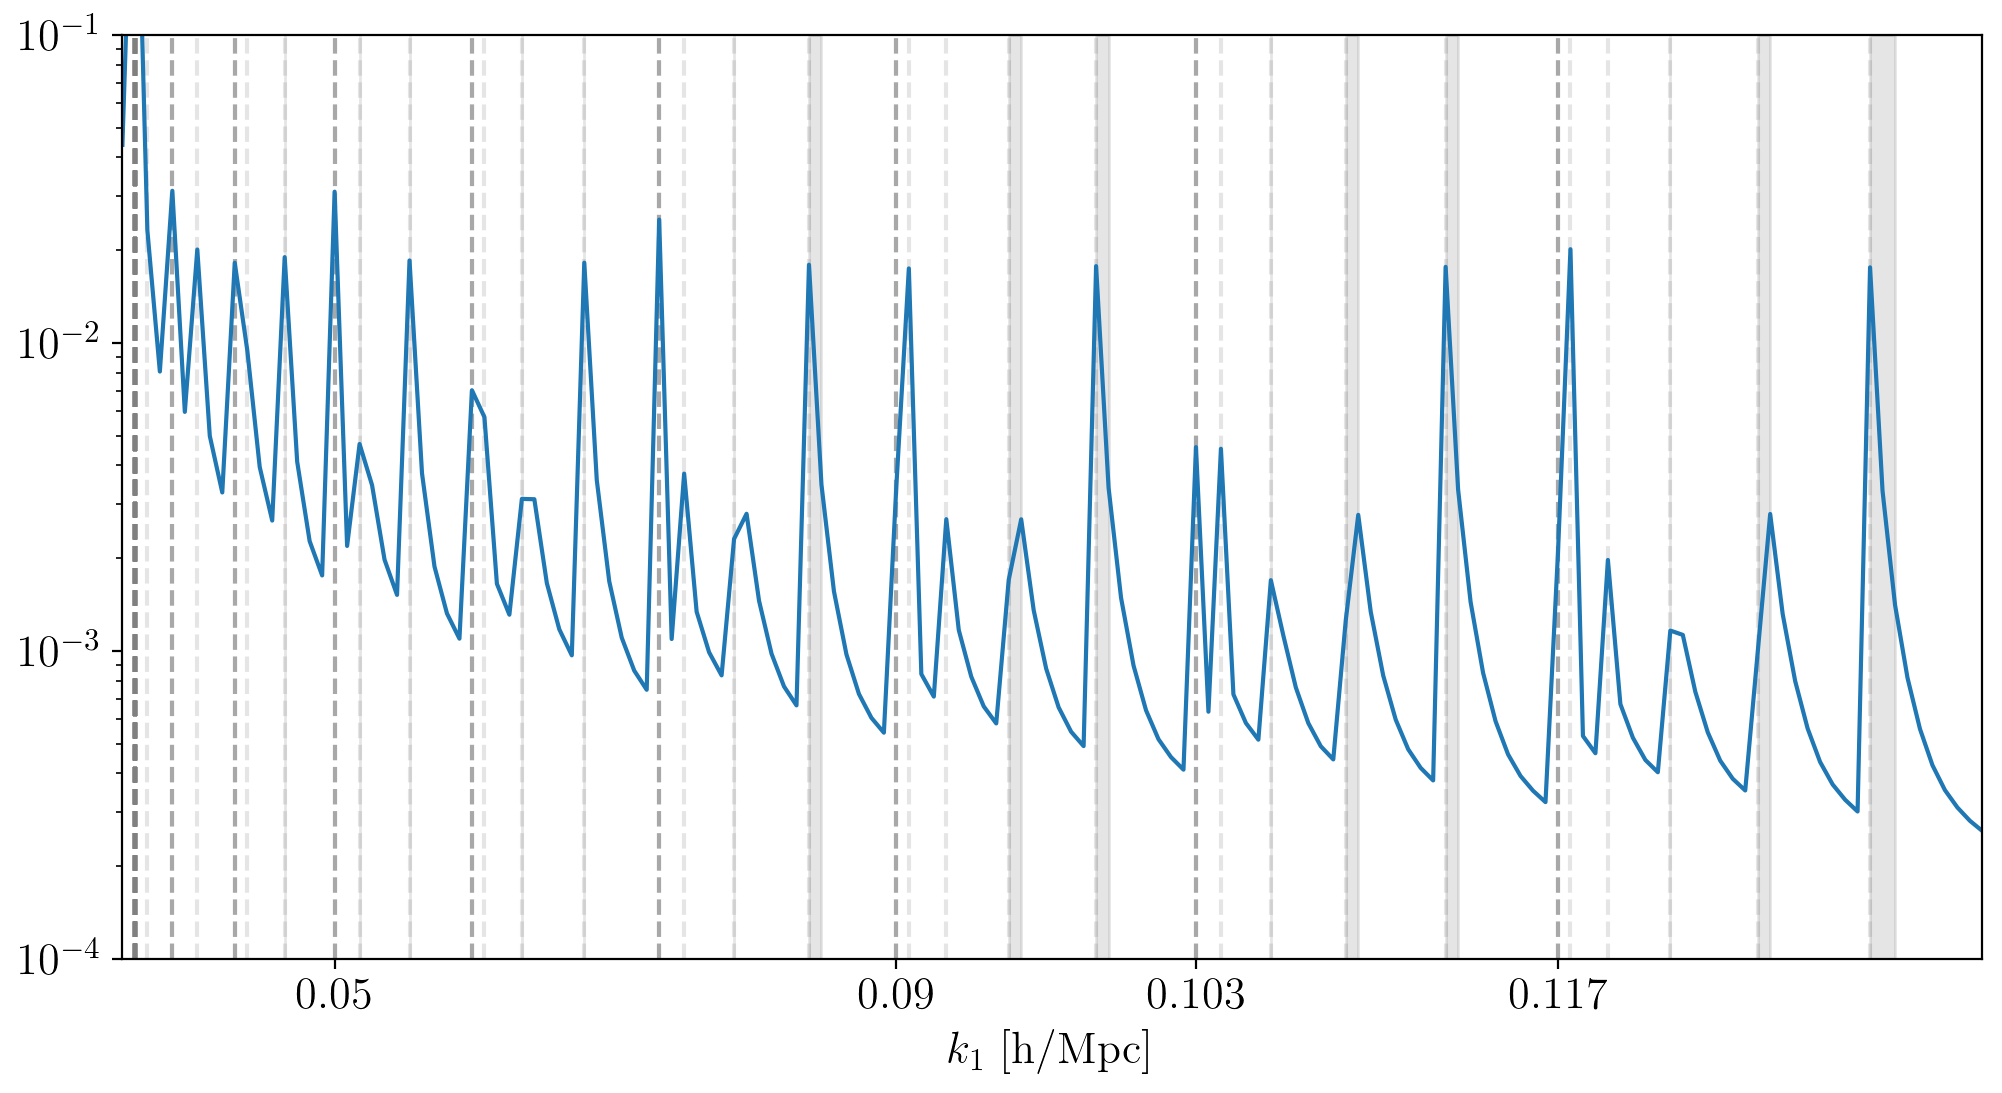

In [21]:
ks = np.linspace(0.01,0.13,10)
k1,k2,k3,theta,mesh_index,tri_bool = plot_all(ks,ymax=1e-1,ymin=1e-4,shade_squeeze=True,log=True)
norm = bk.NPP.l0(cosmo_funcs,k1,k2,k3,theta,zz=1)
plt.plot(np.abs(bk.GR2.l0(cosmo_funcs,k1,k2,k3,theta,zz=1)/norm))

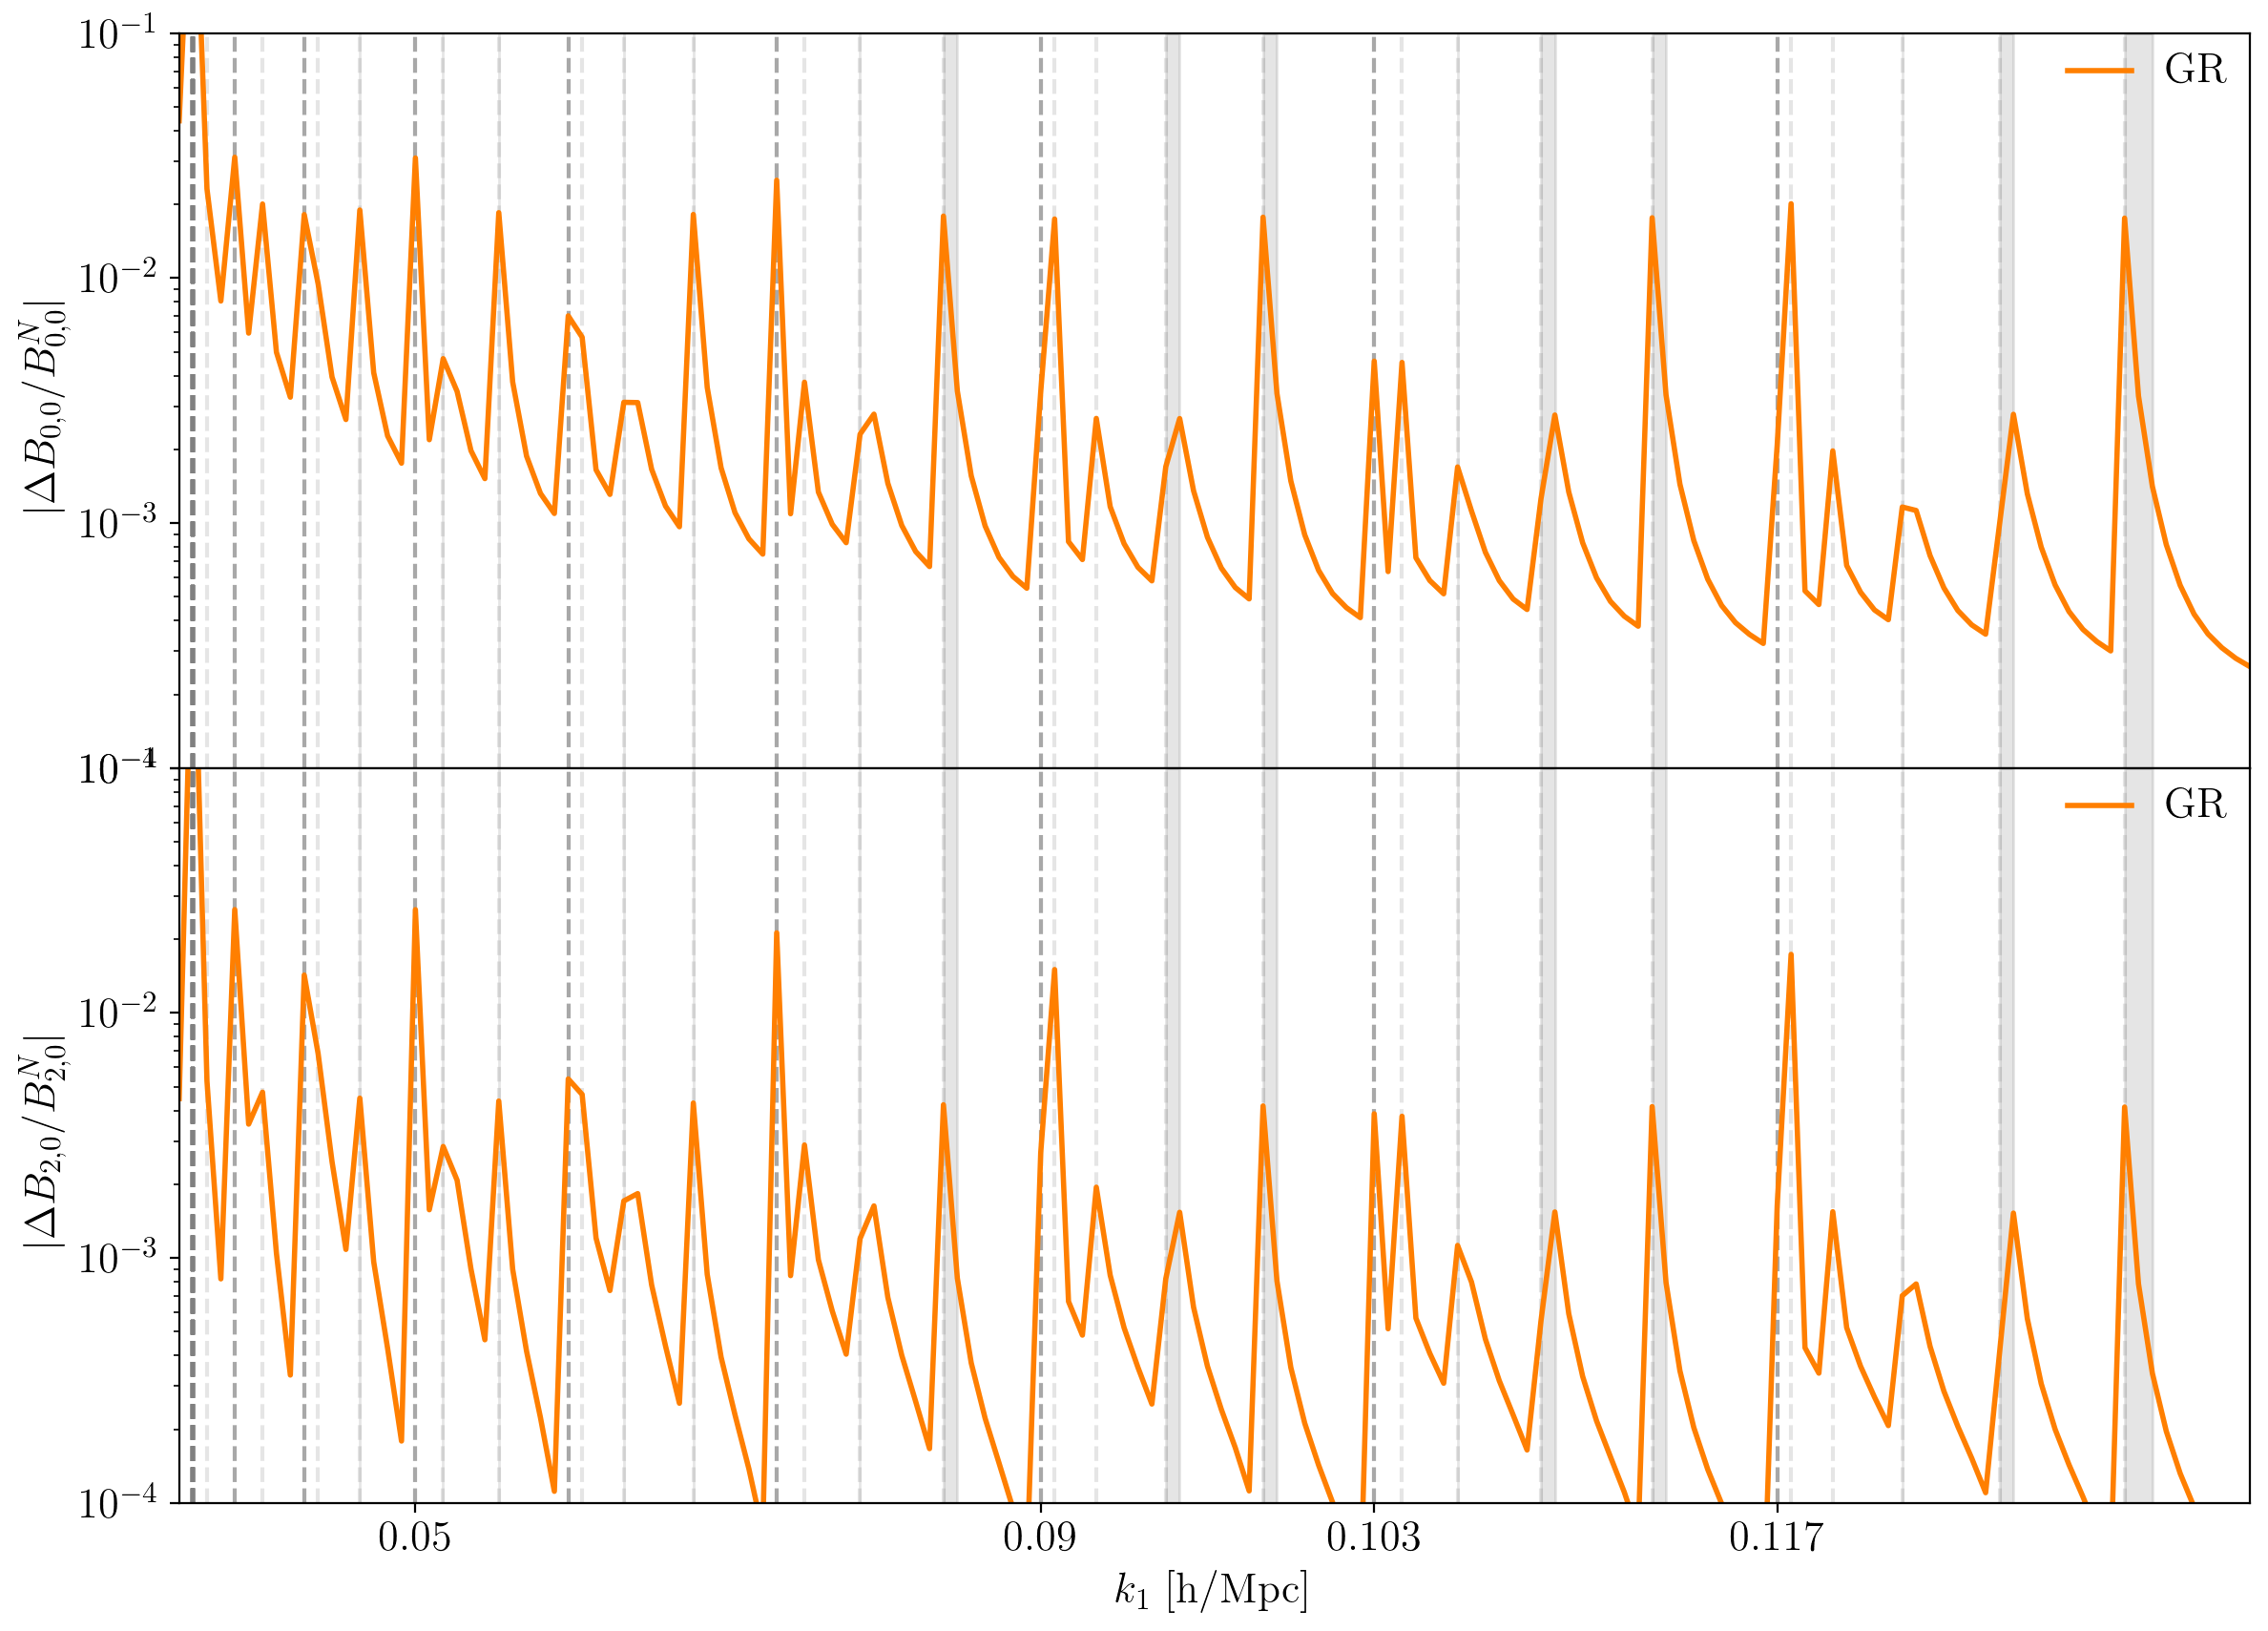

In [31]:
# we can also stitch together a panel with subplots so that prettty neat
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
k1,k2,k3,theta,mesh_index,tri_bool = plot_all(ks,ax=ax1,ymax=1e-1,ymin=1e-4,shade_squeeze=True,log=True)
zz=1
norm = bk.NPP.l0(cosmo_funcs,k1,k2,k3,theta,zz)

r=s=0
ax1.plot(np.abs(bk.GR2.l0(cosmo_funcs,k1,k2,k3,theta,zz)/norm),'-',label='GR',color=colors[1],linewidth =2,alpha=1)
ax1.plot(bk.WSGR.l0(cosmo_funcs,k1,k2,k3,theta,zz,r,s)/norm,'--',label='WS/GR',color='darkblue',alpha=1)

ax1.set_xticklabels([])
ax1.set_ylabel(r'$|\Delta B_{0,0}/B^N_{0,0}|$')
ax1.legend(ncol=3,frameon=False,title_fontsize=18,handlelength=1.5,columnspacing=1,handleheight=0.5, borderpad=0)

k1,k2,k3,theta,mesh_index,tri_bool = plot_all(ks,ax=ax2,ymax=1e-1,ymin=1e-4,shade_squeeze=True,log=True)
ax2.plot(np.abs(bk.GR2.l2(cosmo_funcs,k1,k2,k3,theta,zz)/norm),'-',label='GR',color=colors[1],linewidth =2,alpha=1)
ax2.plot(bk.WSGR.l2(cosmo_funcs,k1,k2,k3,theta,zz,r,s)/norm,'--',label='WS/GR',color='darkblue',alpha=1)

#plt.ylabel(r'$|B_0| \, [\rm Mpc/h]^6$')
ax2.set_ylabel(r'$|\Delta B_{2,0}/B^N_{2,0}|$')
ax2.legend(ncol=3,frameon=False,title_fontsize=18,handlelength=1.5,columnspacing=1,handleheight=0.5, borderpad=0)

plt.subplots_adjust(hspace=0)


### and now for some miscellaneous plots...

100%|██████████| 3/3 [00:47<00:00, 15.80s/it]


(<Figure size 1200x500 with 4 Axes>,
 [<Axes: xlabel='$r$', ylabel='$s$'>,
  <Axes: xlabel='$r$'>,
  <Axes: xlabel='$r$'>])

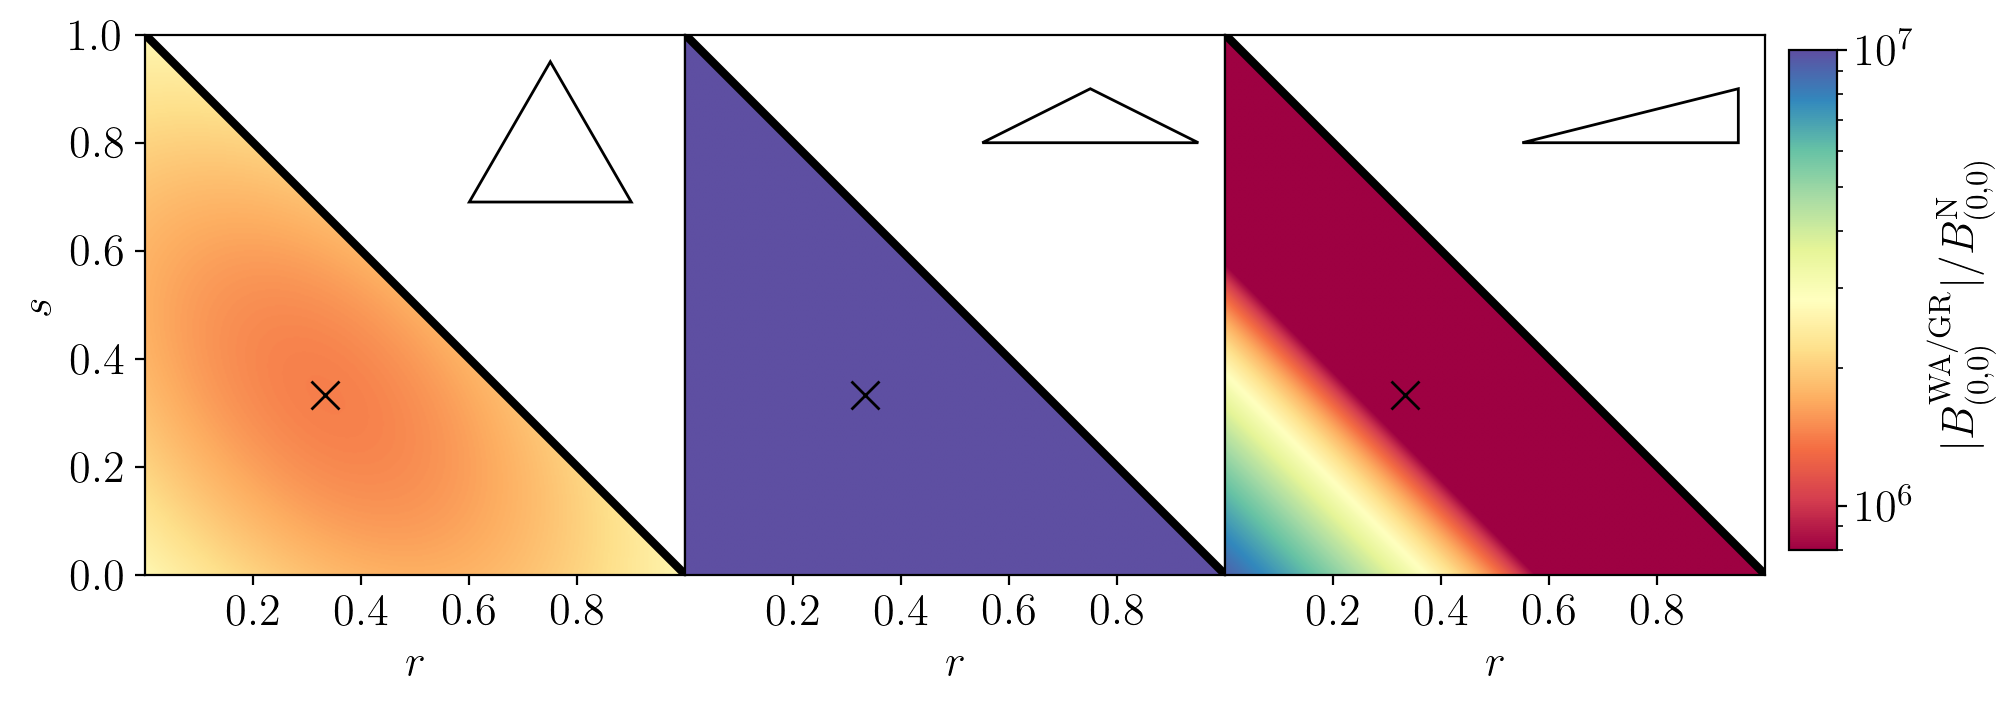

In [8]:
# plot over r and s the LOS orientation in the positions space triangle
plot_rs_multi('WA2',0,cosmo_funcs, zz, size= 400,vmin=8e+5,vmax=1e+7,log=True)

/tmp/ipykernel_107164/3364413204.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0,1].legend(ncol=3,frameon=False,title_fontsize=12,handlelength=1,columnspacing=1,handleheight=0.5, borderpad=0)


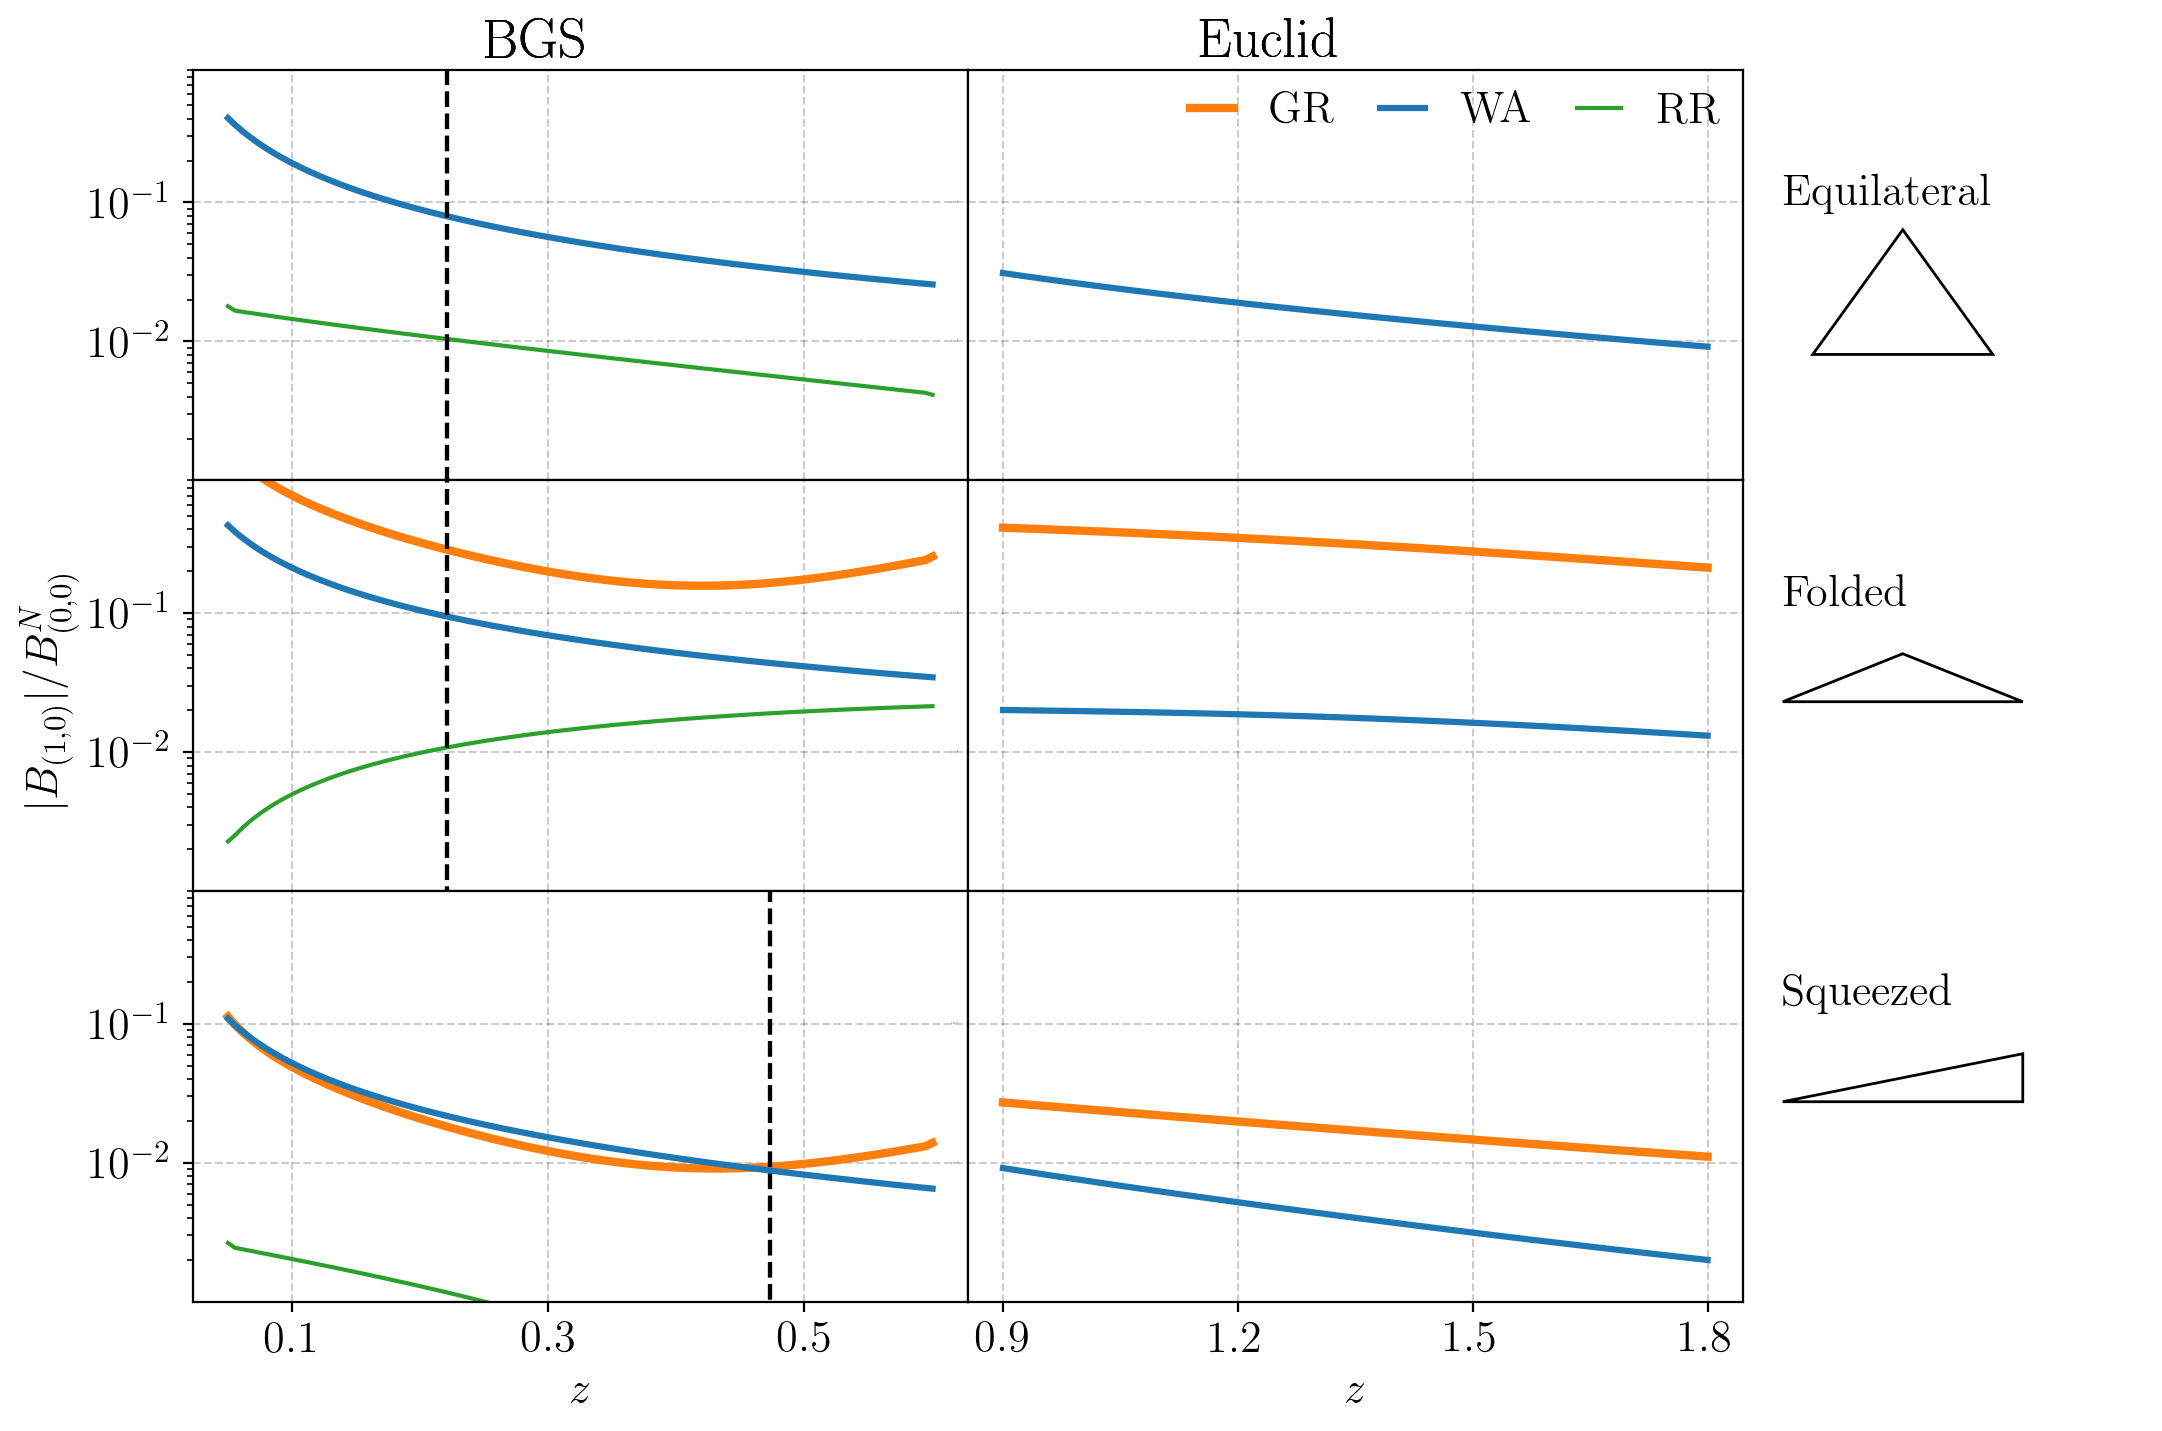

In [40]:
#plot over redshift for some surveys
plot_3x2(['BGS','Euclid'],first=True)